# Homework 1

Modify the coin change code such that the program returns the number of coins for each coin type
for both approaches.

In [1]:
#Approch 1

def coin_change_greedy(amount, denominations):
    denominations = sorted(denominations, reverse=True)   # sort denominations in descending order

    counts = {coin: 0 for coin in denominations}     # initialize counts for each coin

    for coin in denominations:
        num = amount // coin      # integer division
        counts[coin] = num
        amount = amount % coin    # remainder becomes new amount

    return counts

print(coin_change_greedy(39, [1, 2, 5, 10]))


{10: 3, 5: 1, 2: 2, 1: 0}


In [2]:
#Approch 2  Using Recursion
def getMinWithBreakdown(amount, denom, i):
    # base case
    if amount == 0 or i < 0:   # no amount left or no coins left
        return 0, {}

    coin = denom[i]
    take = amount // coin
    leftover = amount % coin

    rest_total, rest_counts = getMinWithBreakdown(leftover, denom, i - 1)   # solve for remainder with smaller coins

    # record usage for this coin
    rest_counts = dict(rest_counts)  # make a copy
    rest_counts[coin] = take    # add current coin usage

    return take + rest_total, rest_counts

def coin_change_recursive(amount, denominations):
    denominations = sorted(denominations)  # sort denominations in ascending order
    total, counts = getMinWithBreakdown(amount, denominations, len(denominations) - 1)    # start with largest coin

    # ensure all coins exist in dict
    for c in denominations[::-1]:  # reverse to match original order
        counts.setdefault(c, 0)   

    return total, counts

total, breakdown = coin_change_recursive(39, [1,2,5,10])
print("total coins =", total)
print("breakdown  =", breakdown)


total coins = 6
breakdown  = {2: 2, 5: 1, 10: 3, 1: 0}


# Homework 2

• Find the Time Complexity and Space Complexity of the greedy algorithm that solve the Maximum <br>
Number of Stocks to Buy problem described earlier. Explain your work and explain how do you come  <br>
up with the time complexity and space complexity.  <br>
• Hint: the algorithm’s performance (the time complexity and space complexity) are as follows. <br>
• Time Complexity = O(n log n) <br>
• Space Complexity = O(n) <br>

In [3]:
def buyMaximumProducts(n, R, price):
    arr = []                            
    for i in range(n):                   # create pairs of [day, price]
        arr.append([i + 1, price[i]])   

    arr.sort(key=lambda x: x[1])        # Sort by price

    total_purchase = 0
    for i in range(n):                  # iterate through sorted prices
        can_buy_today = min(arr[i][0], R // arr[i][1])    # max purchasable today
        total_purchase += can_buy_today                   # update total purchases
        R -= can_buy_today * arr[i][1]                    # update remaining budget

    return total_purchase

price = [10, 7, 19]
R = 45
print(buyMaximumProducts(len(price), R, price))


4


Time Complexity Explanation <br>

1. Building arr takes O(n) because it loops once through the price list. <br>

2. Sorting arr by price takes O(n log n) — this dominates the runtime. <br>

3. The final loop that calculates total stocks runs O(n), with constant-time operations inside. <br> 

Total Time Complexity = O(n log n) <br>

Space Complexity Explanation <br>

1. The list arr stores n pairs [day, price], so it uses O(n) space. <br>

2. A few scalar variables (R, total_purchase, etc.) use O(1) space. <br>

Total Space Complexity = O(n) <br>

# Homework 3

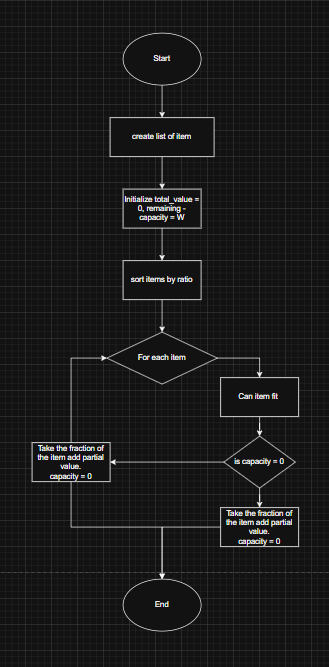

In [4]:
def fractional_knapsack(values, weights, capacity):
    items = []
    for i in range(len(values)):
        ratio = values[i] / weights[i]
        items.append((ratio, values[i], weights[i]))

    items.sort(reverse=True)  # sort by ratio descending

    total_value = 0
    remaining = capacity

    for ratio, value, weight in items:
        if weight <= remaining:
            total_value += value
            remaining -= weight
        else:
            total_value += value * (remaining / weight)
            break

    return total_value

print(fractional_knapsack([60, 100, 120], [10, 20, 30], 50))


240.0


# Homework 4

• Try to improve the algorithm that solves the Bin Packing  <br>Problem. Can we do better?<br>
• Provide a flowchart, pseudocode and python code. <br>

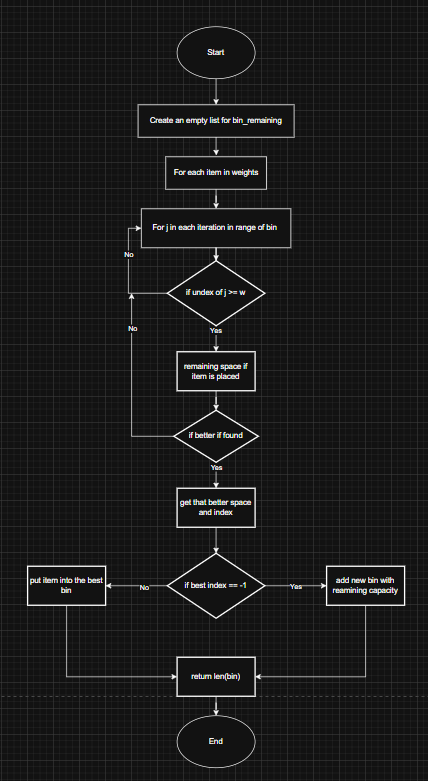

In [5]:
def best_fit(weights, C):
    bin_rem = []  # remaining capacity in each bin

    for w in weights:
        best_index = -1
        best_space_after = None

        # try to find the bin that will be tightest after placing w
        for j in range(len(bin_rem)):     # iterate through existing bins
            if bin_rem[j] >= w:            # bin can accommodate item
                space_after = bin_rem[j] - w            # remaining space if item is placed
                if best_space_after is None or space_after < best_space_after:        # better fit found
                    best_space_after = space_after
                    best_index = j

        if best_index == -1:
            # open a new bin
            bin_rem.append(C - w)    # new bin with remaining capacity
        else:
            # put item into the best bin
            bin_rem[best_index] -= w

    return len(bin_rem)

print(best_fit([2,5,4,7,1,3,8], 10))


4


# Homework 5

• For homework 1 to 4, without using greedy algorithm, come up with an algorithm for each problem. <br>
• Show heuristic (approach), flow chart, pseudo code and actual code (with execution).<br>

1

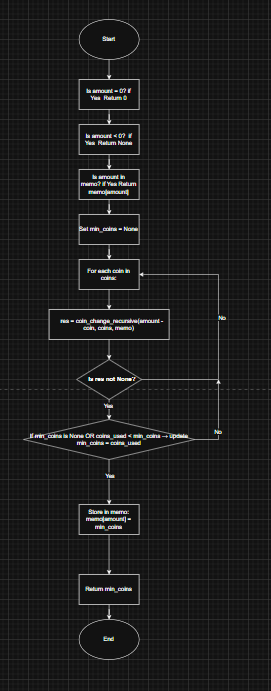

Heuristic: <br>
The idea is that to make a certain amount, I try subtracting each coin and solve the rest of the amount using the same function. If the amount becomes negative, I just skip it. If it reaches zero, that means it can be formed. To make it faster, I save the results in a dictionary called memo, so if the same amount is needed again, I don’t have to calculate it again. This way, I can still find the minimum number of coins without using infinity or a large table.

In [ ]:
def coin_change_recursive(amount, coins, memo={}):
    if amount == 0:
        return 0
    if amount < 0:
        return None
    if amount in memo:
        return memo[amount]

    min_coins = None
    for c in coins:
        res = coin_change_recursive(amount - c, coins, memo)
        if res is not None:
            coins_used = res + 1
            if min_coins is None or coins_used < min_coins:
                min_coins = coins_used

    memo[amount] = min_coins
    return min_coins

print(coin_change_recursive(39, [1,2,5,10]))


2

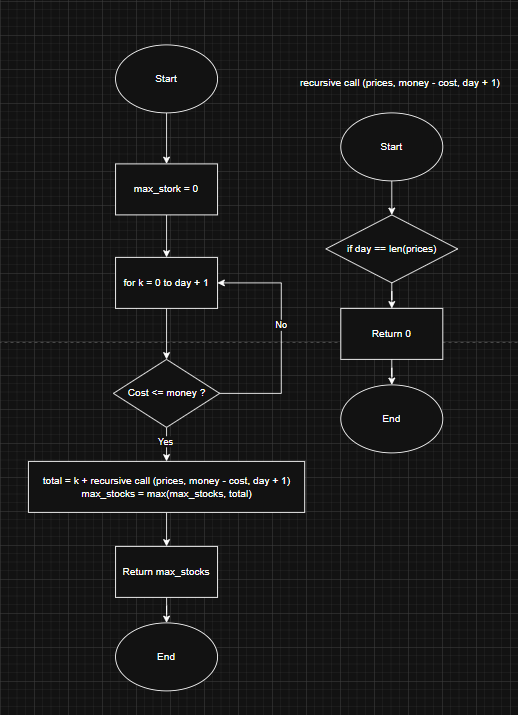

Heuristic: <br>
Instead of using greedy or DP, I use recursion to try all possible numbers of stocks we can buy each day.
For each day, I try buying 0, 1, 2, … up to that day’s limit (i + 1), as long as I still have enough money.
I keep subtracting the spent money and move to the next day.
In the end, I take the maximum number of stocks bought among all valid paths.
This is not the fastest method, but it is simple and correct.

In [ ]:
def max_stocks_bruteforce(prices, money, day=0):
    if day == len(prices): 
        return 0

    max_stocks = 0

    for k in range(0, day + 2):
        cost = k * prices[day]
        if cost <= money:
            total = k + max_stocks_bruteforce(prices, money - cost, day + 1)
            max_stocks = max(max_stocks, total)

    return max_stocks

prices = [10, 7, 19]
money = 45
print(max_stocks_bruteforce(prices, money)) 

3

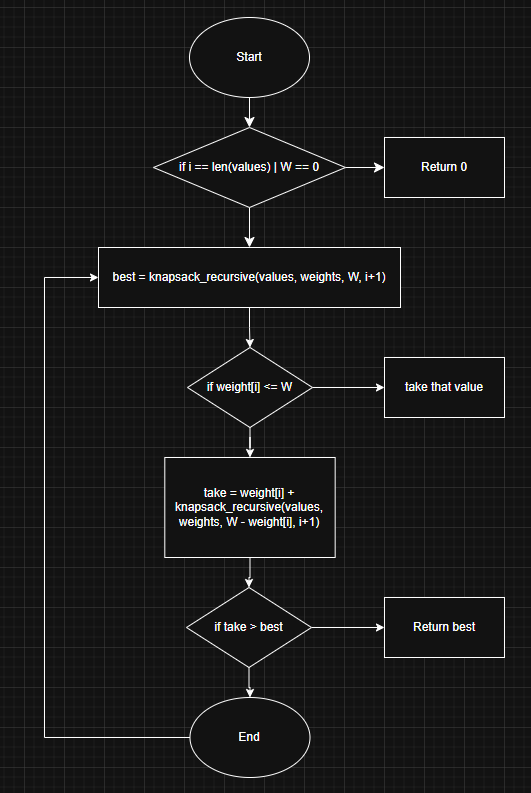

Heuristic: <br>
I use a very simple recursive idea: for each item, I try two choices — take it (if it fits) or skip it — and return whichever gives the higher total value without exceeding the capacity. This checks all combinations, so it’s always correct, but it can be slow when there are many items.

In [ ]:
def knapsack_recursive(values, weights, W, i=0):
    if i == len(values) or W == 0:
        return 0

    best = knapsack_recursive(values, weights, W, i+1)

    if weights[i] <= W:
        take = values[i] + knapsack_recursive(values, weights, W - weights[i], i+1)
        if take > best:
            best = take

    return best

vals  = [60, 100, 120]
wts   = [10, 20, 30]
cap   = 50
print(knapsack_recursive(vals, wts, cap))  


4

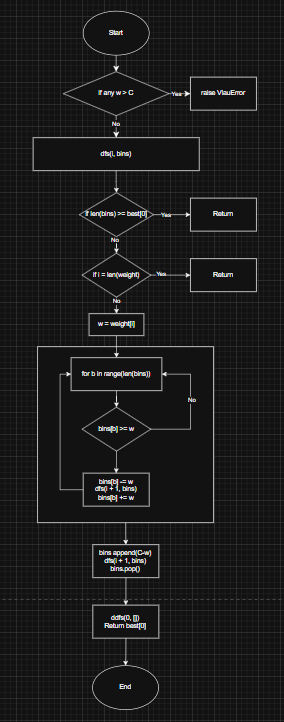

Heuristic: <br>
The non-greedy version of the bin packing problem uses backtracking to find the true minimum number of bins needed. Instead of placing each item in the first or best-fitting bin like the greedy method, this approach explores every possible way of arranging items into bins. It tries to place each item in existing bins or opens a new one if needed, while pruning branches that already use too many bins. Although it’s slower, this exhaustive search guarantees the optimal packing solution and helps compare how accurate the greedy algorithm is.

BIN_PACKING(weights, capacity)
    best = length of weights    
    function dfs(index, bin_remaining):
        if index == length of weights:
            best = min(best, length of bin_remaining)
            return

        current_item = weights[index]

        # try putting item in existing bins
        for each bin in bin_remaining:
            if bin >= current_item:
                bin = bin - current_item
                dfs(index + 1, bin_remaining)
                bin = bin + current_item   # backtrack

        # try opening a new bin
        add (capacity - current_item) to bin_remaining
        dfs(index + 1, bin_remaining)
        remove the last bin from bin_remaining   # backtrack

    call dfs(0, empty list)
    return best


In [ ]:
def bin_packing_simple(weights, C):
    if any(w > C for w in weights):
        raise ValueError("Found an item larger than bin capacity")

    best = [len(weights)]

    def dfs(i, bins):
        if len(bins) >= best[0]:
            return

        if i == len(weights):
            best[0] = len(bins)
            return

        w = weights[i]

        for b in range(len(bins)):
            if bins[b] >= w:
                bins[b] -= w
                dfs(i + 1, bins)
                bins[b] += w

        bins.append(C - w)
        dfs(i + 1, bins)
        bins.pop()

    dfs(0, [])
    return best[0]
